# Experiment with Smart Crane Data
This dataset comprises information gathered from an industrial overhead crane connected to an OPC UA server during its operation along an L-shaped trajectory. The crane was driven with varying loads (0kg, 120kg, 500kg, and 1000kg), and each driving cycle involved the activation and deactivation of an anti-sway system.


[reference] Riku Ala-Laurinaho, Tuomas Keski-Heikkilä, May 27, 2022, "Driving Smart Crane With Various Loads", IEEE Dataport, doi: https://dx.doi.org/10.21227/6b9d-tr16.

In [ ]:
import foressment_ai as foras
import pandas as pd
import numpy as np
df = pd.read_csv('../datasets/IEEE_smart_crane.csv')
df.head()

,Date,Alarm,BridgeSpeedFeedback,HoistMotorTorque,BridgePosition,BridgeRopeAngle,BridgeMotorTorque,HoistSpeedFeedback,LoadTare,HoistPosition,TrolleyMotorTorque,TrolleySpeedFeedback,TrolleyPosition,TrolleyRopeAngle,Cycle
0,2103-09-03 15:27:13+00:00,0,0.0,0.0,16.575,0.002737,0.0,0.0,-0.04,0.188,0.0,0.0,1.963,0.004295,1
1,2103-09-03 15:27:13.250000+00:00,0,0.0,0.0,16.575,0.002737,0.0,0.0,-0.04,0.188,0.0,0.0,1.963,0.004295,1
2,2103-09-03 15:27:13.500000+00:00,0,0.0,0.0,16.575,0.002737,0.0,0.0,-0.04,0.188,0.0,0.0,1.963,0.004295,1
3,2103-09-03 15:27:13.750000+00:00,0,0.0,0.0,16.575,0.002737,0.0,0.0,-0.04,0.188,0.0,0.0,1.963,0.004295,1
4,2103-09-03 15:27:14+00:00,0,0.0,0.0,16.575,0.002737,0.0,0.0,-0.04,0.188,0.0,0.0,1.963,0.004295,1


We first check the labels; there are 8 distinct cycles.

In [ ]:
np.unique(df['Cycle'])

array([1, 2, 3, 4, 5, 6, 7, 8])

## Data Pre-processing
We remove the irrelevant column, split data, normalise the features and prepare data for model training.

In [ ]:
df.drop("Date", axis=1, inplace=True)

In [ ]:
X, y = df.iloc[:,:12],df.iloc[:,-1:]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.33,random_state=42)

In [ ]:
classes=len(np.unique(y))

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
y_train = y_train - 1
y_test = y_test - 1

In [ ]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train,num_classes=8)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=8)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# DeepCNN

In [ ]:
model = foras.DeepCNN(input_shape=(X_train.shape[1],1), blocks=2, units=64, classes=classes)
# Train the model
hist_train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

The plot displays the accuracy optimisation during the training process.

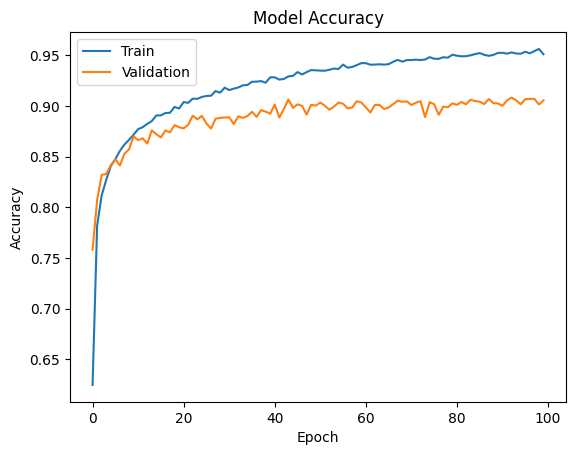

In [ ]:
model.draw_plot()

The overall evaluation matrics is calculated based on the testing set.

In [ ]:
model.test(X_test, y_test)

323/323 [==============================] - 1s 4ms/step - loss: 0.2707 - accuracy: 0.9054 - recall_4: 0.9985 - precision_4: 0.4108 - auc: 0.9487


[0.27065834403038025,
 0.9054210782051086,
 0.9984511137008667,
 0.4108017683029175,
 0.9486749768257141]

The classification report is printed based on the testing set.

In [ ]:
model.print_classification_report(X_test, y_test)

323/323 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       822
           1       0.91      0.92      0.91      1224
           2       0.91      0.86      0.88       909
           3       0.89      0.92      0.91      1211
           4       0.90      0.83      0.86      1358
           5       0.91      0.95      0.93      2372
           6       0.93      0.89      0.91      1060
           7       0.92      0.95      0.93      1374

    accuracy                           0.91     10330
   macro avg       0.90      0.90      0.90     10330
weighted avg       0.91      0.91      0.90     10330


# Test hybrid CNN-GRU

In [ ]:
hybrid_classifier = foras.Hybrid_CNN_GRU(input_shape=(X_train.shape[1],1), units=64, classes=classes)

In [ ]:
hybrid_classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

The plot displays the accuracy optimisation during the training process.

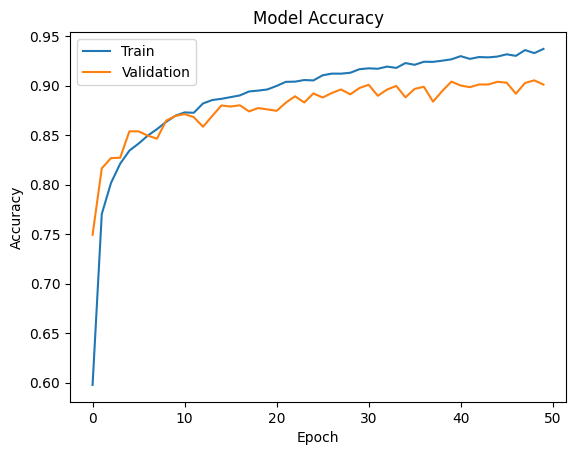

In [ ]:
hybrid_classifier.draw_plot()

The overall evaluation matrics is calculated based on the testing set.

In [ ]:
hybrid_classifier.test(X_test, y_test)

323/323 [==============================] - 3s 8ms/step - loss: 0.2641 - accuracy: 0.9010 - recall_6: 0.9004 - precision_6: 0.9017 - auc: 0.9919


[0.2640542685985565,
 0.900968074798584,
 0.9003872275352478,
 0.9016965627670288,
 0.9918575882911682]

The classification report is printed based on the testing set.

In [ ]:
hybrid_classifier.print_classification_report(X_test, y_test)

323/323 [==============================] - 5s 10ms/step
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       822
           1       0.87      0.92      0.90      1224
           2       0.93      0.83      0.88       909
           3       0.88      0.94      0.91      1211
           4       0.87      0.88      0.87      1358
           5       0.93      0.92      0.93      2372
           6       0.94      0.88      0.91      1060
           7       0.91      0.95      0.93      1374

    accuracy                           0.90     10330
   macro avg       0.90      0.89      0.89     10330
weighted avg       0.90      0.90      0.90     10330


# Test Residual

In [ ]:
hybrid_ = foras.hybrid_variation(input_shape=(X_train.shape[1],1), units=64, classes=classes, block="residual", loop_number=2)

In [ ]:
hybrid_.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

The plot displays the accuracy optimisation during the training process.

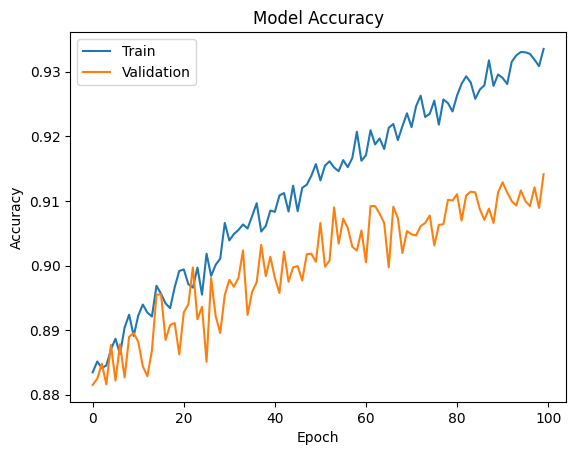

In [ ]:
hybrid_.draw_plot()

The overall evaluation matrics is calculated based on the testing set.

In [ ]:
hybrid_.test(X_test, y_test)

323/323 [==============================] - 5s 14ms/step - loss: 0.2203 - accuracy: 0.9141 - recall_7: 0.9135 - precision_7: 0.9152 - auc: 0.9945


[0.22029300034046173,
 0.914133608341217,
 0.9134559631347656,
 0.9152279496192932,
 0.9944869875907898]


The classification report is printed based on the testing set.

In [ ]:
hybrid_.print_classification_report(X_test, y_test)

323/323 [==============================] - 5s 16ms/step
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       822
           1       0.95      0.88      0.92      1224
           2       0.91      0.89      0.90       909
           3       0.91      0.93      0.92      1211
           4       0.86      0.90      0.88      1358
           5       0.94      0.92      0.93      2372
           6       0.90      0.94      0.92      1060
           7       0.95      0.92      0.94      1374

    accuracy                           0.91     10330
   macro avg       0.91      0.91      0.91     10330
weighted avg       0.92      0.91      0.91     10330


# test Xception

In [ ]:
xcept = foras.hybrid_variation(input_shape=(X_train.shape[1],1), units=64, classes=classes, block="Xception", loop_number=2)

In [ ]:
xcept.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

The plot displays the accuracy optimisation during the training process.

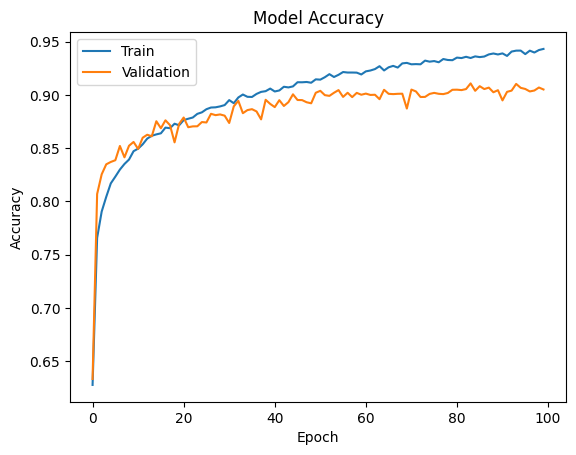

In [ ]:
xcept.draw_plot()


The overall evaluation matrics is calculated based on the testing set.

In [ ]:
xcept.test(X_test, y_test)

323/323 [==============================] - 3s 10ms/step - loss: 0.2648 - accuracy: 0.9051 - recall_8: 0.9045 - precision_8: 0.9065 - auc: 0.9921


[0.26480358839035034,
 0.9051306843757629,
 0.9044530391693115,
 0.906471312046051,
 0.9920901656150818]


The classification report is printed based on the testing set.

In [ ]:
xcept.print_classification_report(X_test, y_test)

323/323 [==============================] - 4s 9ms/step
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       822
           1       0.92      0.90      0.91      1224
           2       0.91      0.85      0.88       909
           3       0.88      0.93      0.91      1211
           4       0.88      0.84      0.86      1358
           5       0.91      0.93      0.92      2372
           6       0.91      0.93      0.92      1060
           7       0.95      0.93      0.94      1374

    accuracy                           0.91     10330
   macro avg       0.90      0.90      0.90     10330
weighted avg       0.91      0.91      0.90     10330
